In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# קריאת הנתונים
df = pd.read_csv("flight_data_kiwi_allsnaps_clean.csv")

In [11]:
# ניקוי עמודת המחיר מהסימן "₪"
df['Price'] = df['Price'].replace({'₪': '', ',': ''}, regex=True).astype(float)

In [12]:
# תצוגה ראשונית של הנתונים
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271981 entries, 0 to 271980
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Snap Date      271981 non-null  object 
 1   Dep Date       271981 non-null  object 
 2   Return Date    271981 non-null  object 
 3   Outbound       271981 non-null  object 
 4   Dep Time       271981 non-null  object 
 5   Dep Duration   271981 non-null  object 
 6   Dep Arrival    271981 non-null  object 
 7   From           271981 non-null  object 
 8   Stops          271981 non-null  int64  
 9   Landing        271981 non-null  object 
 10  Inbound        271981 non-null  object 
 11  Back Time      271981 non-null  object 
 12  Back Duration  271981 non-null  object 
 13  Back Arrival   271981 non-null  object 
 14  From.1         271981 non-null  object 
 15  Stops.1        271981 non-null  int64  
 16  Landing.1      271981 non-null  object 
 17  Dep Company    271981 non-nul

In [13]:
# טיפול בערכים חסרים
df.dropna(inplace=True)  # מחיקת שורות עם ערכים חסרים

In [14]:
# בדיקת outliers באמצעות Tukey method (1.5 * IQR)
# 
def detect_outliers_tukey(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Flight Price Distribution')
plt.xlabel('Price in $')
plt.ylabel('תדירות')
plt.show()

NameError: name 'df_cleaned' is not defined

<Figure size 1000x600 with 0 Axes>

In [15]:
# זיהוי ומחיקת outliers עבור מחירי טיסות
price_outliers = detect_outliers_tukey(df, 'Price')
df = df[~df.index.isin(price_outliers.index)]

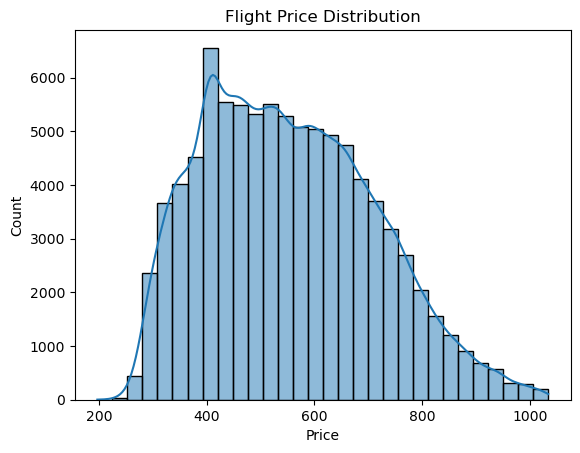

In [33]:
# ניתוח מחירים כלליים
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Flight Price Distribution")
plt.show()

In [18]:
df.columns

Index(['Snap Date', 'Dep Date', 'Return Date', 'Outbound', 'Dep Time',
       'Dep Duration', 'Dep Arrival', 'From', 'Stops', 'Landing', 'Inbound',
       'Back Time', 'Back Duration', 'Back Arrival', 'From.1', 'Stops.1',
       'Landing.1', 'Dep Company', 'Back Company', 'Price'],
      dtype='object')

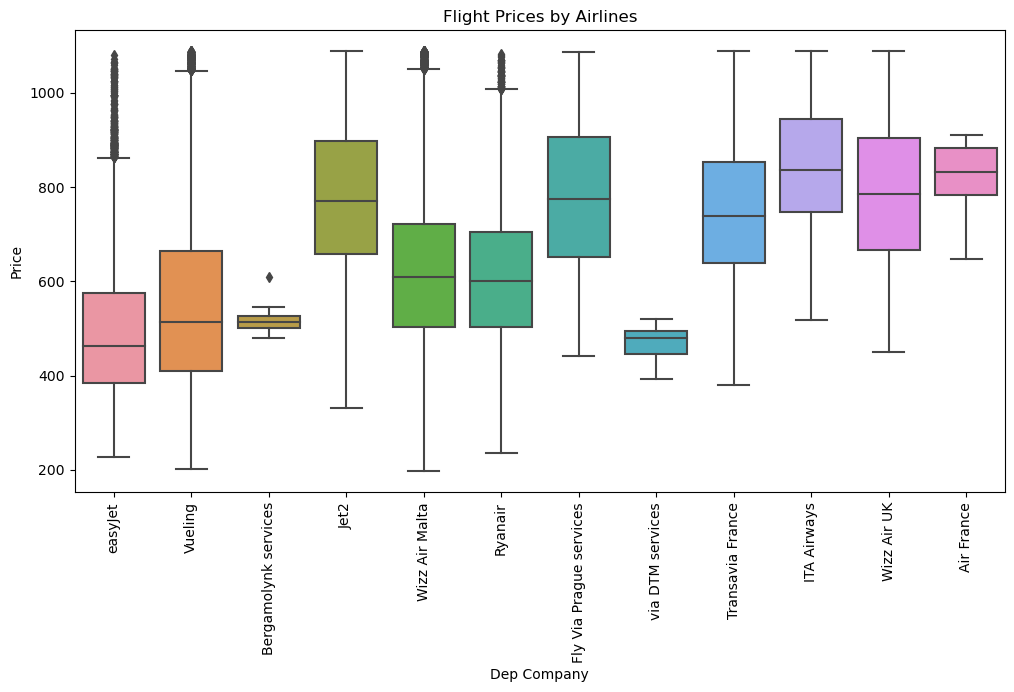

In [16]:
# מחירי טיסות לפי חברות תעופה
plt.figure(figsize=(12,6))
sns.boxplot(x='Dep Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Flight Prices by Airlines")
plt.show()

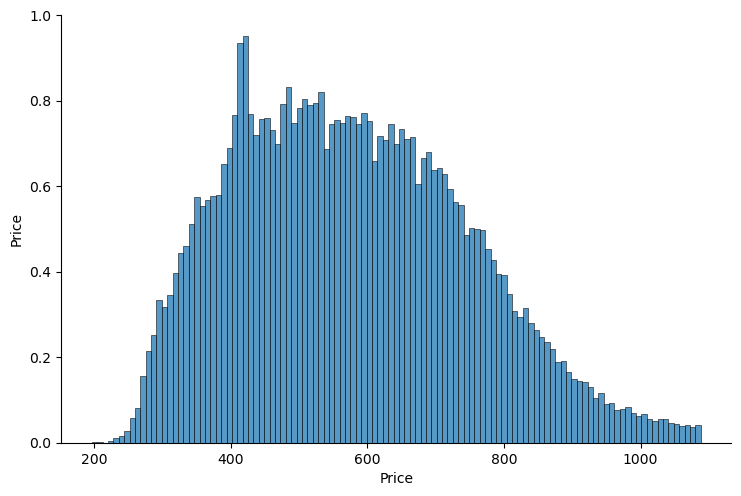

In [30]:
# חקירת תלות בין משתנים
sns.pairplot(df[['Price', 'Dep Time', 'Dep Arrival', 'Dep Duration']], height=5, aspect=1.5)  # Increase `height` and `aspect` as needed

# Show the plot
plt.show()

C:\Users\liort\AppData\Local\Temp\ipykernel_26112\2991858246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


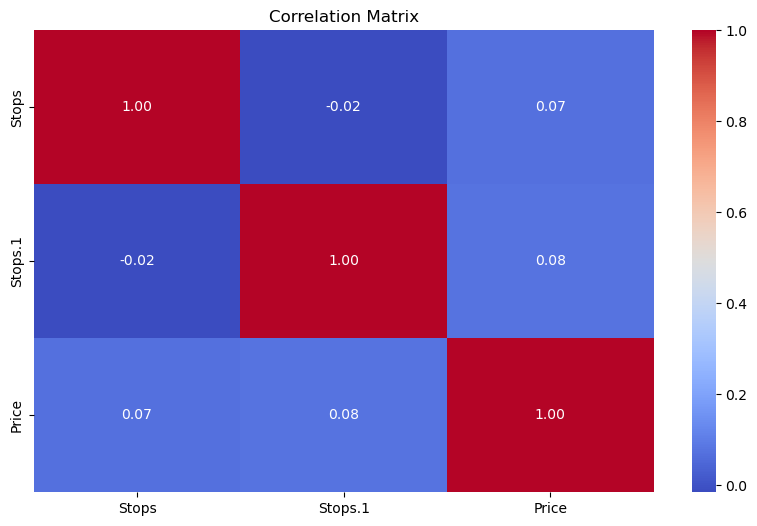

In [32]:
# מטריצת מתאמים בין משתנים מספריים
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [33]:
# שמירת הנתונים לאחר עיבוד
df.to_csv('cleaned_file.csv', index=False)
print(f"Cleaned data saved to cleaned_file.csv")

Cleaned data saved to cleaned_file.csv
